In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_risco_credito = pd.read_csv('risco_credito.csv')

In [3]:
base_risco_credito.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [4]:
X_risco = base_risco_credito.drop('risco', axis=1).values
y_risco = base_risco_credito['risco'].values

In [5]:
y_risco

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [6]:
X_risco

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
X_risco = base_risco_credito.drop('risco', axis=1).apply(LabelEncoder().fit_transform).values

In [9]:
X_risco

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]])

In [10]:
import pickle
with open('risco_credito.1.pkl', mode='wb') as f:
    pickle.dump([X_risco, y_risco], f)

In [11]:
# Importando Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_risco_credito = GaussianNB()

# Fazendo o treinamento do algoritmo
X_risco = naive_risco_credito.fit(X_risco, y_risco)

In [12]:
X_risco

GaussianNB()

In [13]:
base_risco_credito.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [14]:
# historia boa(0), divida alta(0), garantias nehnhuma(1) renda > 35(2)
# historia ruim(2), divida alta(0), garantias adequada(0) renda < 15(0)

previsao = naive_risco_credito.predict([[2,0,0,0], [0,0,1,2]])

In [15]:
previsao

array(['moderado', 'baixo'], dtype='<U8')

In [16]:
y_risco

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

## Decision Trees

In [17]:
with open('risco_credito.1.pkl', 'rb') as f:
    X_risco, y_risco = pickle.load(f)

In [18]:
X_risco

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]])

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
arvore = DecisionTreeClassifier(criterion='entropy')

In [21]:
# treinando
arvore.fit(X_risco, y_risco)

DecisionTreeClassifier(criterion='entropy')

In [22]:
# podemos ver e retornar a importancia de cada atributo da arvore
print('Hsitorico | Divida | Garantia | Renda')
arvore.feature_importances_

Hsitorico | Divida | Garantia | Renda


array([0.48015651, 0.03885431, 0.03885431, 0.44213486])

[Text(372.0, 498.3, ' Renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(223.20000000000002, 407.70000000000005, 'Historia <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(148.8, 317.1, ' Renda <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(74.4, 226.5, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(223.20000000000002, 226.5, ' Divida <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]\nclass = moderado'),
 Text(148.8, 135.89999999999998, 'Historia <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = alto'),
 Text(74.4, 45.299999999999955, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(223.20000000000002, 45.299999999999955, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(297.6, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(297.6, 317.1, 'entropy = 0.0\nsamples

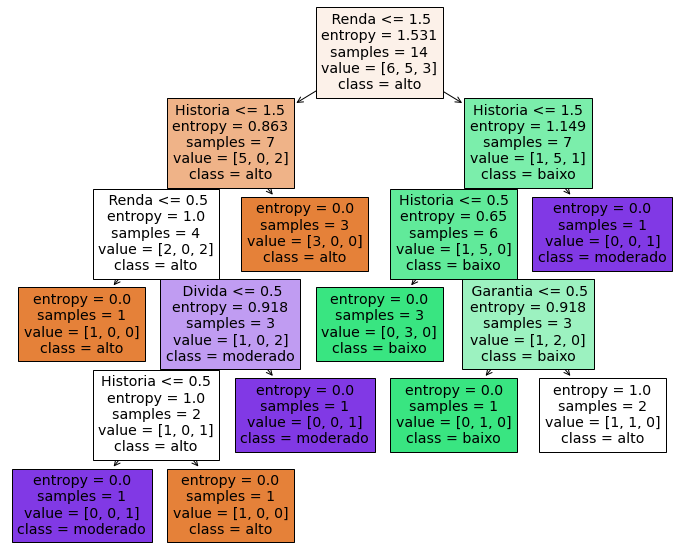

In [23]:
# Visualizando a arvore de decisao
from sklearn import tree
previsores = 'Historia, Divida, Garantia, Renda'.split(',')
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
tree.plot_tree(arvore, feature_names=previsores, class_names = arvore.classes_, filled=True)

In [24]:
# historia boa(0), divida alta(0), garantias nehnhuma(1) renda > 35(2)
# historia ruim(2), divida alta(0), garantias adequada(0) renda < 15(0)

previsao = arvore.predict([[0,0,1,2], [2,0,0,0]])
previsao

array(['baixo', 'alto'], dtype=object)

## KNN - base crédito 99%

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
import pickle
with open('credit.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [27]:
X_train.shape, y_train.shape

((1500, 3), (1500,))

In [28]:
# parametros default
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
predict = knn.predict(X_test)

In [31]:
predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print('KNN'.center(55))
print('Classification Report:')
print(classification_report(y_test, predict))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predict))

                          KNN                          
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500

Confusion Matrix:
[[432   4]
 [  3  61]]


## Regressão logística

In [34]:
X_risco

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]])

In [35]:
len(X_risco)

14

In [36]:
y_risco # 2, 7, 11

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [37]:
X_risco = np.delete(X_risco, [2,7,11], axis = 0)
y_risco = np.delete(y_risco, [2,7,11], axis = 0)

In [38]:
y_risco

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [39]:
X_risco

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]])

In [40]:
len(X_risco)

11

In [41]:
# NOTE: max_iter = , numero de vezes que vamos fazer os ajustes dos valroes para encontrarmos parametros ideais
from sklearn.linear_model import LogisticRegression

In [42]:
logre = LogisticRegression(random_state=1)
logre.fit(X_risco, y_risco)

LogisticRegression(random_state=1)

In [43]:
# b0
logre.intercept_

array([-0.80828993])

In [44]:
# B1
logre.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [45]:
# historia boa(0), divida alta(0), garantias nehnhuma(1) renda > 35(2)
# historia ruim(2), divida alta(0), garantias adequada(0) renda < 15(0)

predict = logre.predict([[0,0,1,2], [2,0,0,0]])
predict

array(['baixo', 'alto'], dtype=object)

## SVM - Support Vector Machines

In [46]:
from sklearn.svm import SVC

In [47]:
import pickle
with open('credit.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [48]:
# Objetivo encontrar os vetores de suporte, para gerarmos a linha reta para classificacao dos registros

# Faremos o teste com 500 registros
X_test.shape, y_test.shape

((500, 3), (500,))

##### Priemiro teste com kernel linear

In [49]:
svm = SVC(kernel = 'linear', random_state = 1, C= 1.0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [50]:
predict = svm.predict(X_test)

In [51]:
predict

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
print('SVM Linear'.center(55))
print('Classification Report:')
print(classification_report(y_test, predict))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predict))

                       SVM Linear                      
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.78      0.80      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500

Confusion Matrix:
[[422  14]
 [ 13  51]]


#### Segundo teste com kernel polynomial

In [54]:
svm = SVC(kernel = 'poly', random_state = 1, C= 1.0)
svm.fit(X_train, y_train)

predict = svm.predict(X_test)
print('SVM - Polynomial'.center(55))
print('Classification Report:')
print(classification_report(y_test, predict))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predict))

                    SVM - Polynomial                   
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       436
           1       0.94      0.80      0.86        64

    accuracy                           0.97       500
   macro avg       0.96      0.89      0.92       500
weighted avg       0.97      0.97      0.97       500

Confusion Matrix:
[[433   3]
 [ 13  51]]


#### Terceiro teste com funcao sigmoid

In [55]:
svm = SVC(kernel = 'sigmoid', random_state = 1, C= 1.0)
svm.fit(X_train, y_train)

predict = svm.predict(X_test)
print('SVM - Sigmoid'.center(55))
print('Classification Report:')
print(classification_report(y_test, predict))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predict))

                     SVM - Sigmoid                     
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       436
           1       0.38      0.41      0.39        64

    accuracy                           0.84       500
   macro avg       0.64      0.65      0.65       500
weighted avg       0.84      0.84      0.84       500

Confusion Matrix:
[[393  43]
 [ 38  26]]


#### Quarto teste com kernel RBF Radial basis function kernel valor default

In [56]:
svm = SVC(kernel = 'rbf', random_state = 1, C= 2.0) # valor de C = 2.0
svm.fit(X_train, y_train)

predict = svm.predict(X_test)
print('SVM - Radial basis function'.center(55))
print('Classification Report:')
print(classification_report(y_test, predict))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predict))

              SVM - Radial basis function              
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500

Confusion Matrix:
[[434   2]
 [  4  60]]


## Redes Neurais

In [57]:
import pickle
with open('credit.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [58]:
from sklearn.neural_network import MLPClassifier # Multilayer Perceptron

In [59]:
# Formula para calcular numero de entradas nas coluans
# (entradas + saida) / 2

In [60]:
neural_net = MLPClassifier(max_iter=1000, verbose=True, solver='adam', activation='relu', hidden_layer_sizes = (2,2))

In [61]:
neural_net.fit(X_train,y_train)

Iteration 1, loss = 1.36448312
Iteration 2, loss = 1.35116261
Iteration 3, loss = 1.33812932
Iteration 4, loss = 1.32533896
Iteration 5, loss = 1.31281330
Iteration 6, loss = 1.30058251
Iteration 7, loss = 1.28866263
Iteration 8, loss = 1.27713025
Iteration 9, loss = 1.26594006
Iteration 10, loss = 1.25504036
Iteration 11, loss = 1.24460871
Iteration 12, loss = 1.23427919
Iteration 13, loss = 1.22433562
Iteration 14, loss = 1.21471167
Iteration 15, loss = 1.20523071
Iteration 16, loss = 1.19623347
Iteration 17, loss = 1.18728896
Iteration 18, loss = 1.17863148
Iteration 19, loss = 1.17019682
Iteration 20, loss = 1.16204625
Iteration 21, loss = 1.15400484
Iteration 22, loss = 1.14609979
Iteration 23, loss = 1.13826606
Iteration 24, loss = 1.13058632
Iteration 25, loss = 1.12307956
Iteration 26, loss = 1.11561118
Iteration 27, loss = 1.10833462
Iteration 28, loss = 1.10124307
Iteration 29, loss = 1.09443987
Iteration 30, loss = 1.08766600
Iteration 31, loss = 1.08101868
Iteration 32, los

Iteration 259, loss = 0.51126629
Iteration 260, loss = 0.51035350
Iteration 261, loss = 0.50945671
Iteration 262, loss = 0.50856369
Iteration 263, loss = 0.50769063
Iteration 264, loss = 0.50680440
Iteration 265, loss = 0.50594444
Iteration 266, loss = 0.50508703
Iteration 267, loss = 0.50419561
Iteration 268, loss = 0.50335621
Iteration 269, loss = 0.50250373
Iteration 270, loss = 0.50168792
Iteration 271, loss = 0.50085353
Iteration 272, loss = 0.50003379
Iteration 273, loss = 0.49922386
Iteration 274, loss = 0.49842085
Iteration 275, loss = 0.49763949
Iteration 276, loss = 0.49685190
Iteration 277, loss = 0.49606152
Iteration 278, loss = 0.49528226
Iteration 279, loss = 0.49450362
Iteration 280, loss = 0.49375033
Iteration 281, loss = 0.49299078
Iteration 282, loss = 0.49222130
Iteration 283, loss = 0.49147749
Iteration 284, loss = 0.49073639
Iteration 285, loss = 0.48999393
Iteration 286, loss = 0.48929013
Iteration 287, loss = 0.48856043
Iteration 288, loss = 0.48783007
Iteration 

MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1000, verbose=True)

In [62]:
predict = neural_net.predict(X_test)
print('Neural Net'.center(55))
print('Classification Report:')
print(classification_report(y_test, predict))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predict))

                       Neural Net                      
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       436
           1       0.00      0.00      0.00        64

    accuracy                           0.87       500
   macro avg       0.44      0.50      0.47       500
weighted avg       0.76      0.87      0.81       500

Confusion Matrix:
[[436   0]
 [ 64   0]]


c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Tunning dos parametros com GridSearch

In [63]:
from sklearn.model_selection import GridSearchCV # CV = Cross Valdiation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [64]:
# Nao aplicaremos o tunning dos parametros para o algoritmo de Naive Bayes pelo fato de que nao existe
# nenhum parametro relevante para enviarmos para este algoritmo

In [65]:
# import pickle
# with open('census.pkl', mode='rb') as f:
#     X_train, X_test, y_train, y_test = pickle.load(f)

In [66]:
# X_train.shape, y_train.shape

In [67]:
# X_test.shape, y_test.shape

In [68]:
# y_census = np.concatenate((y_train, y_test), axis=0)
# y_census.shape

Decision Trees

In [69]:
# parameters = {'criterion': ['gini', 'entropy'],
#              'splitter': ['best', 'random'],
#              'min_samples_split': [2, 5, 10],
#              'min_samples_leaf': [1, 5, 10]}

# grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
# grid_search.fit(X_census, y_census)
# best_parameters = grid_search.best_params_
# best_result = grid_search.best_score_

# print(best_parameters)
# print(best_result)

Random Forests

In [70]:
# parameters = {'criterion': ['gini', 'entropy'],
#              'n_estimators': [10, 40, 100, 150],
#              'min_samples_split': [2, 5, 10],
#              'min_samples_leaf': [1, 5, 10]}

# grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
# grid_search.fit(X_census, y_census)
# best_parameters = grid_search.best_params_
# best_result = grid_search.best_score_

# print(best_parameters)
# print(best_result)

KNN

In [71]:
# parameters = {'n_neighbors': [3, 5, 10, 20],
#              'p': [1, 2]}


# grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
# grid_search.fit(X_census, y_census)
# best_parameters = grid_search.best_params_
# best_result = grid_search.best_score_

# print(best_parameters)
# print(best_result)

Logistic Regression

In [72]:
# parameters = {'n_neighbors': [3, 5, 10, 20],
#              'p': [1, 2]}


# grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
# grid_search.fit(X_census, y_census)
# best_parameters = grid_search.best_params_
# best_result = grid_search.best_score_

# print(best_parameters)
# print(best_result)

SVM

In [73]:
# parameters = {'tol:'[0.001, 0.0001, 0.00001],
#              'C': [1.0, 1.5, 2.0],
#              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters)
# grid_search.fit(X_census, y_census)
# best_parameters = grid_search.best_params_
# best_result = grid_search.best_score_

# print(best_parameters)
# print(best_result)

Neural Nets

In [74]:
# parameters = {'activation': ['relu', 'logistic', 'tahn'],
#              'solver': ['adam', 'sgd'],
#              'batch_size': [10, 56]}

# grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters)
# grid_search.fit(X_census, y_census)
# best_parameters = grid_search.best_params_
# best_result = grid_search.best_score_

In [75]:
# print(best_parameters)
# print(best_result)

## Validacao Cruzada

In [76]:
import pickle
with open('credit.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [77]:
from sklearn.model_selection import cross_val_score, KFold

In [78]:
from sklearn.model_selection import GridSearchCV # CV = Cross Valdiation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

results_tree = []
results_random_forest = []
results_knn = []
results_logistic = []
results_svm = []
results_neural = []

# A base de dados sera dividida em 10 pedacos, e a cada rodada utilizaremos 9 pedacos para treinamento e 1 para teste
for i in range(30):
#     print(i)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(tree, X_train, y_train, cv=kfold)
    results_tree.append(scores.mean())
    
    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, X_train, y_train, cv=kfold)
    results_random_forest.append(scores.mean())
    
    knn = KNeighborsClassifier()
    score = cross_val_score(knn, X_train, y_train, cv=kfold)
    results_knn.append(score.mean())
    
    logistic = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistic, X_train, y_train, cv=kfold)
    results_logistic.append(scores.mean())
    
    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, X_train, y_train, cv=kfold)
    results_svm.append(scores.mean())
    
    neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(neural, X_train, y_train, cv=kfold)
    results_neural.append(scores.mean())    

c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

In [79]:
results = pd.DataFrame({'Arvore': results_tree, 'Random Forest': results_random_forest, 'KNN': results_knn,
                       'Logistic': results_logistic, 'SVM': results_svm, 'Redes Neurais': results_neural})

In [80]:
# DF Accuracy
results

,Arvore,Random Forest,KNN,Logistic,SVM,Redes Neurais
0,0.986667,0.986667,0.980000,0.945333,0.982667,0.994667
1,0.987333,0.982000,0.977333,0.947333,0.984667,0.996000
2,0.988667,0.983333,0.977333,0.946000,0.984000,0.995333
3,0.988667,0.986667,0.978667,0.945333,0.986000,0.996000
4,0.986667,0.982000,0.978667,0.948667,0.984000,0.995333
5,0.984000,0.978000,0.978000,0.945333,0.984000,0.996000
6,0.988667,0.988000,0.979333,0.944667,0.984000,0.995333
7,0.986000,0.984667,0.976667,0.946000,0.983333,0.996000
8,0.985333,0.988000,0.980667,0.948000,0.984000,0.994667
9,0.984667,0.984000,0.981333,0.945333,0.983333,0.995333


In [81]:
results.describe()

,Arvore,Random Forest,KNN,Logistic,SVM,Redes Neurais
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.986844,0.983667,0.978511,0.946444,0.984311,0.995733
std,0.001733,0.002360,0.001791,0.001279,0.000922,0.000713
min,0.983333,0.978000,0.974000,0.944667,0.982667,0.994667
25%,0.986000,0.982167,0.977333,0.945333,0.983333,0.995333
50%,0.987333,0.983667,0.978667,0.946000,0.984000,0.995667
75%,0.987833,0.984667,0.980000,0.947333,0.985333,0.996000
max,0.990667,0.988000,0.981333,0.948667,0.986000,0.997333


In [82]:
# Variancia
results.var()

Arvore           3.001788e-06
Random Forest    5.570881e-06
KNN              3.208685e-06
Logistic         1.634738e-06
SVM              8.500639e-07
Redes Neurais    5.088123e-07
dtype: float64

In [83]:
# Desvio padrao
results.std()

Arvore           0.001733
Random Forest    0.002360
KNN              0.001791
Logistic         0.001279
SVM              0.000922
Redes Neurais    0.000713
dtype: float64

In [84]:
# Coeficiente de Variacao
((results.std() / results.mean()) * 100)

Arvore           0.175566
Random Forest    0.239946
KNN              0.183062
Logistic         0.135092
SVM              0.093668
Redes Neurais    0.071637
dtype: float64

## Teste de normalidade nos resultados

In [85]:
# Alpha 0.05 indica que a confianca de nosso teste sera de 95%
alpha = 0.05

In [86]:
# shapiro =  https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
from scipy.stats import shapiro

In [87]:
# Este teste estatisco ira indicar se uma distribuicao e ou nao normal
shapiro(results_tree),shapiro(results_random_forest),shapiro(results_knn),shapiro(results_logistic),shapiro(results_svm),shapiro(results_neural)

(ShapiroResult(statistic=0.9602916836738586, pvalue=0.31513142585754395),
 ShapiroResult(statistic=0.9784520864486694, pvalue=0.7830691933631897),
 ShapiroResult(statistic=0.9508203268051147, pvalue=0.17782633006572723),
 ShapiroResult(statistic=0.9077780246734619, pvalue=0.013084661215543747),
 ShapiroResult(statistic=0.9102646112442017, pvalue=0.015110890381038189),
 ShapiroResult(statistic=0.8984092473983765, pvalue=0.007680609822273254))

In [88]:
import seaborn as sns

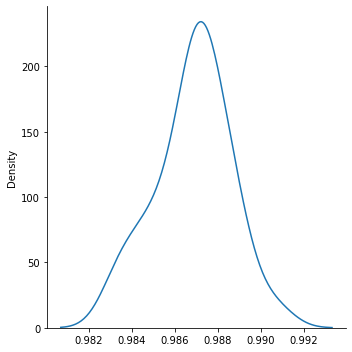

In [89]:
sns.displot(results_tree, kind='kde')

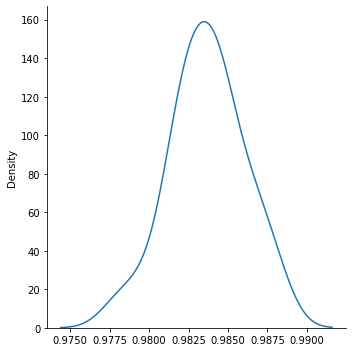

In [90]:
sns.displot(results_random_forest, kind='kde')

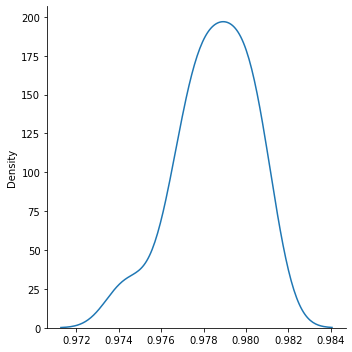

In [91]:
sns.displot(results_knn, kind='kde')

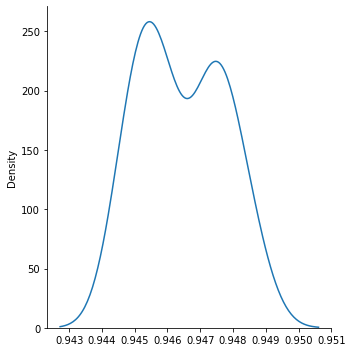

In [92]:
sns.displot(results_logistic, kind='kde')

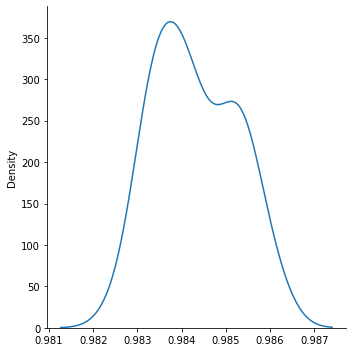

In [93]:
sns.displot(results_svm, kind='kde')

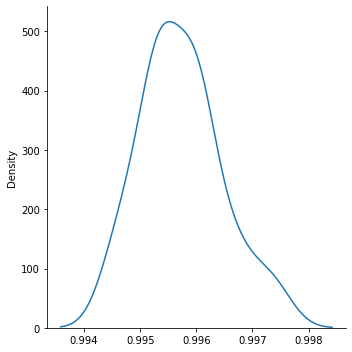

In [94]:
sns.displot(results_neural, kind='kde')

## Teste de hipotese com ANOVA e Tukey

In [95]:
from scipy.stats import f_oneway

In [119]:
p = f_oneway(results_tree, results_random_forest, results_knn, results_logistic, results_svm, results_neural)

In [120]:
p

F_onewayResult(statistic=3536.0435377913864, pvalue=6.530663553050155e-173)

In [121]:
alpha = 0.05
if p[0] <= alpha or p[1] <= alpha:
    print('Hipotese nula rejeitada. Dados sao diferentes')
else:
    print('Hipotese alternativa rejeitada. Resultados sao iguais')

Hipotese nula rejeitada. Dados sao diferentes


In [200]:
results_tests = {'accuracy': np.concatenate([results_tree, results_random_forest, results_knn,results_logistic, results_svm, results_neural]),
                'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [204]:
results_df = pd.DataFrame(results_tests)
results_df.head(60)

,accuracy,algoritmo
0,0.986667,arvore
1,0.987333,arvore
2,0.988667,arvore
3,0.988667,arvore
4,0.986667,arvore
5,0.984000,arvore
6,0.988667,arvore
7,0.986000,arvore
8,0.985333,arvore
9,0.984667,arvore


In [205]:
from statsmodels.stats.multicomp import MultiComparison

In [206]:
compare = MultiComparison(results_df['accuracy'], results_df['algoritmo'])

In [209]:
statistic_test = compare.tukeyhsd()

In [210]:
print(statistic_test)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0083   -0.0 -0.0095 -0.0072   True
       arvore     logistica  -0.0404   -0.0 -0.0416 -0.0392   True
       arvore random_forest  -0.0032    0.0 -0.0043  -0.002   True
       arvore   rede_neural   0.0089   -0.0  0.0077  0.0101   True
       arvore           svm  -0.0025    0.0 -0.0037 -0.0014   True
          knn     logistica  -0.0321   -0.0 -0.0332 -0.0309   True
          knn random_forest   0.0052   -0.0   0.004  0.0063   True
          knn   rede_neural   0.0172   -0.0  0.0161  0.0184   True
          knn           svm   0.0058   -0.0  0.0046   0.007   True
    logistica random_forest   0.0372   -0.0  0.0361  0.0384   True
    logistica   rede_neural   0.0493   -0.0  0.0481  0.0505   True
    logistica           svm   0.0379   -0.0  0.0367   0.039   

In [212]:
# Redes neurais de fato e melhor estatisticamente que todos os algortimos
results.mean()

Arvore           0.986844
Random Forest    0.983667
KNN              0.978511
Logistic         0.946444
SVM              0.984311
Redes Neurais    0.995733
dtype: float64

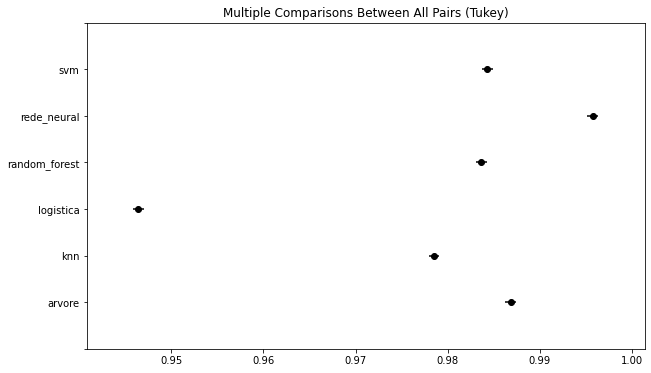

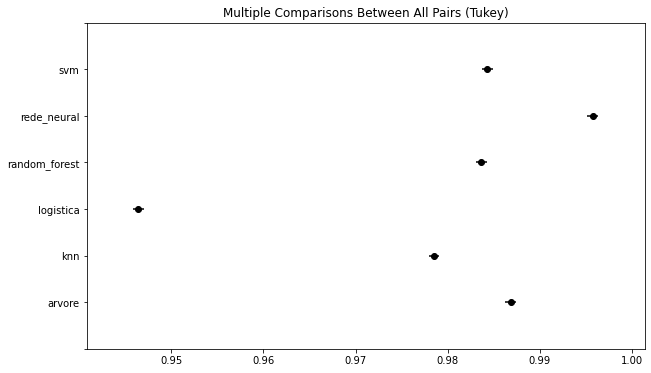

In [213]:
statistic_test.plot_simultaneous()

## Salvar um classificador já treinado

In [215]:
with open('credit.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [216]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [217]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
classificador_rede_neural.fit(X_train, y_train)

c:\users\mygam\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [218]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [313]:
classificador_svm = SVC(kernel='rbf', C=2.0, probability=True)
classificador_svm.fit(X_train, y_train)

SVC(C=2.0, probability=True)

In [314]:
# Salvando classificadores treinados com pickle
import pickle

# Rede Neural
pickle.dump(classificador_rede_neural, open('rede_neural_finalizada.sav', 'wb'))
# Arvore
pickle.dump(classificador_arvore, open('arvore_finalizada.sav', 'wb'))
# SVM
pickle.dump(classificador_svm, open('svm_finalizada.sav', 'wb'))

## Carregar um classificador já treinado

In [318]:
rede_neural = pickle.load(open('rede_neural_finalizada.sav', 'rb'))
arvores = pickle.load(open('arvore_finalizada.sav', 'rb'))
svm = pickle.load(open('svm_finalizada.sav', 'rb')) 

In [342]:
novo_registro = X_train[0]
novo_registro

array([-1.3754462 ,  0.50631087,  0.10980934])

In [343]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [344]:
rede_neural.predict(novo_registro)
# este cliente pagaria o imprestimo

array([0], dtype=int64)

In [345]:
arvores.predict(novo_registro)

array([0], dtype=int64)

In [346]:
svm.predict(novo_registro)

array([0], dtype=int64)

## Combinação de classificadores

In [347]:
resposta1 = rede_neural.predict(novo_registro)
resposta2 = arvores.predict(novo_registro)
resposta3 = svm.predict(novo_registro)

In [348]:
resposta1[0], resposta2[0], resposta3[0]

(0, 0, 0)

In [349]:
paga = 0
n_paga = 1

if resposta1[0] == 1:
    n_paga +=1
else:
    paga +=1
    
if resposta2[0] == 1:
    n_paga +=1
else:
    paga +=1
    
if resposta3[0] == 1:
    n_paga +=1
else:
    paga +=1
    
if paga > n_paga:
    print('Cliente pagara o emprestimo')
elif paga == n_paga:
    print('Empate')
else:
    print('Cliente NAO pagara o emprestimo')   

Cliente pagara o emprestimo


## Rejeição de classificadores

In [350]:
resposta1 = rede_neural.predict(novo_registro)
resposta2 = arvores.predict(novo_registro)
resposta3 = svm.predict(novo_registro)
resposta1[0], resposta2[0], resposta3[0]

(0, 0, 0)

In [351]:
probability_respost1 = rede_neural.predict_proba(novo_registro)
probability_respost1

array([[1.00000000e+00, 5.19003588e-13]])

In [352]:
confianca_rede_neural = probability_respost1.max()
confianca_rede_neural

0.999999999999481

In [353]:
probability_respost2 = arvores.predict_proba(novo_registro)
confianca_tree = probability_respost2.max()
confianca_tree

1.0

In [354]:
probability_respost3 = svm.predict_proba(novo_registro)
confianca_svm = probability_respost3.max()
confianca_svm

0.9999772836481907

In [355]:
paga = 0
n_paga = 1
confianca_minima = 0.99999
algoritmos = 0

if confianca_rede_neural >= confianca_minima:
    algoritmos +=1
    if resposta1[0] == 1:
        n_paga +=1
    else:
        paga +=1
    
if confianca_tree >= confianca_minima:
    algoritmos +=1
    if resposta2[0] == 1:
        n_paga +=1
    else:
        paga +=1

if confianca_svm >= confianca_minima:
    algoritmos +=1
    if resposta3[0] == 1:
        n_paga +=1
    else:
        paga +=1

if paga > n_paga:
    print(f'Cliente pagara o emprestimo baseado em {algoritmos} algoritmos')
elif paga == n_paga:
    print(f'Empate baseado em {algoritmos}')
else:
    print(f'Cliente NAO pagara o emprestimo baseado em {algoritmos} algoritmos')   

Cliente pagara o emprestimo baseado em 2 algoritmos
